In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

num_samples = 50
mean_class1 = [0, 0]
mean_class2 = [-2, -2]
mean_class3 = [2, 2]
variance = [[1, 0], [0, 1]]

In [2]:
data_class1 = np.random.multivariate_normal(mean_class1, variance, num_samples)
data_class2 = np.random.multivariate_normal(mean_class2, variance, num_samples)
data_class3 = np.random.multivariate_normal(mean_class3, variance, num_samples)

##1. Plot

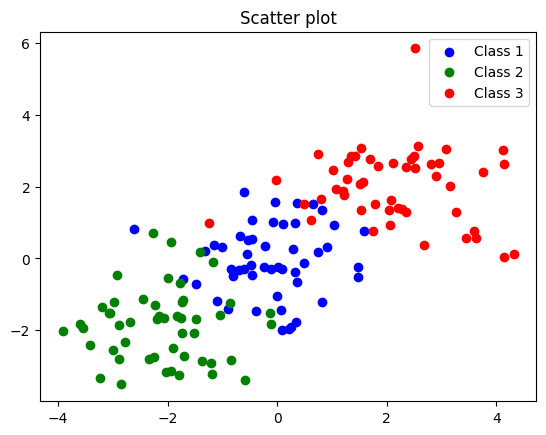

In [3]:
# Plotting
plt.scatter(data_class1[:, 0], data_class1[:, 1], color='blue', label='Class 1')
plt.scatter(data_class2[:, 0], data_class2[:, 1], color='green', label='Class 2')
plt.scatter(data_class3[:, 0], data_class3[:, 1], color='red', label='Class 3')
plt.title("Scatter plot")
plt.legend()
plt.show()

##2. Parzen Classifier

In [4]:
def kernel(x, h=1.0):
    d = x.shape[1]  # dimension
    kernel_value = (1 / (np.sqrt(2 * np.pi) ** d * h ** d)) * np.exp(-0.5 * np.sum(x**2, axis=1) / h**2)
    return kernel_value

In [5]:
def parzen_window(x, data_points, h=1.0):
    n = data_points.shape[0]
    d = data_points.shape[1]
    x_repeated = np.tile(x, (n, 1))
    densities = kernel(x_repeated - data_points, h)
    p_hat = np.sum(densities) / n
    return p_hat

In [6]:
def classify_parzen(x, data_classes, h=1.0):
    densities = [parzen_window(x, data, h) for data in data_classes]
    class_label = np.argmax(densities)
    return class_label

In [7]:
x_test = np.array([
    [0.1, 0.1],
    [-2.0, -2.0],
    [2.0, 2.0],
    [-1.0, 1.0]
])

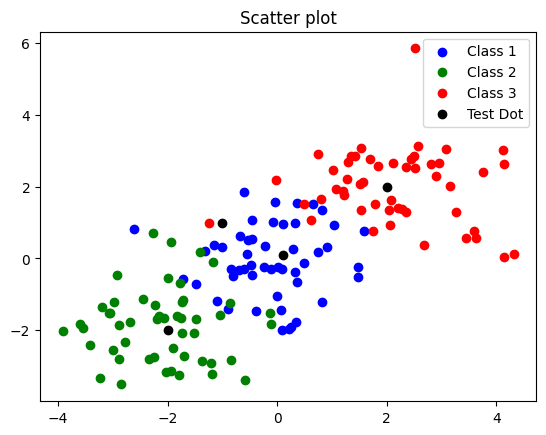

In [8]:
# Plotting
plt.scatter(data_class1[:, 0], data_class1[:, 1], color='blue', label='Class 1')
plt.scatter(data_class2[:, 0], data_class2[:, 1], color='green', label='Class 2')
plt.scatter(data_class3[:, 0], data_class3[:, 1], color='red', label='Class 3')
plt.scatter(x_test[:, 0], x_test[:, 1], color='black', label='Test Dot')
plt.title("Scatter plot")
plt.legend()
plt.show()

## Classification with 50 points


In [9]:
Vn = 1.0
Results = {}
Classes = [data_class1, data_class2, data_class3]
classifications = [classify_parzen(point, Classes, Vn) for point in x_test]
Results[Vn] = classifications
Results[Vn]

[0, 1, 2, 0]

In [10]:
Vn = 0.1
classifications = [classify_parzen(point, Classes, Vn) for point in x_test]
Results[Vn] = classifications
Results[Vn]

[0, 1, 2, 2]

## Classification with 500 points


In [11]:
num_samples = 500
data_class1 = np.random.multivariate_normal(mean_class1, variance, num_samples)
data_class2 = np.random.multivariate_normal(mean_class2, variance, num_samples)
data_class3 = np.random.multivariate_normal(mean_class3, variance, num_samples)

In [12]:
Vn = 1.0
Results_2 = {}
Classes = [data_class1, data_class2, data_class3]
classifications = [classify_parzen(point, Classes, Vn) for point in x_test]
Results_2[Vn] = classifications
Results_2[Vn]

[0, 1, 2, 0]

In [13]:
Vn = 0.1
classifications = [classify_parzen(point, Classes, Vn) for point in x_test]
Results_2[Vn] = classifications
Results_2[Vn]

[0, 1, 2, 0]